<a href="https://colab.research.google.com/github/AdirGelkop/Bitcoin/blob/main/screening_AI_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Screening AI Project

The goal in our project is to predict Bitcoin's value using regression analysis. The project involves leveraging data from other stock performances to build a predictive model for cryptocurrency trends.

## Initial Preparations

In [ ]:
#!pip install yfinance # If not installed, you need to install it.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [2]:
# Define the ticker symbols for each asset
tickers = {
    'AUD': 'AUDUSD=X',                 # Australian Dollar to USD
    #'Bitcoin': 'BTC-USD',              # Bitcoin in USD
    'Bitfarms': 'BITF',                # Bitfarms Ltd.
    'Block': 'SQ',                     # Block, Inc. (formerly Square, Inc.)
    'Brent Oil': 'BZ=F',               # Brent Crude Oil Futures
    'Coinbase': 'COIN',                # Coinbase Global, Inc.
    'DAX': '^GDAXI',                   # DAX Index
    'DXY': 'DX-Y.NYB',                 # U.S. Dollar Index
    'Dow Jones': '^DJI',               # Dow Jones Industrial Average
    'Ethereum': 'ETH-USD',             # Ethereum in USD
    'FTSE 100': '^FTSE',               # FTSE 100 Index
    'Galaxy Digital Holdings': 'GLXY.TO', # Galaxy Digital Holdings Ltd. (Toronto Stock Exchange)
    'GBP': 'GBPUSD=X',                 # British Pound to USD
    'Gold': 'GC=F',                    # Gold Futures
    'Grayscale Bitcoin Trust': 'GBTC', # Grayscale Bitcoin Trust
    'Hut 8 Mining': 'HUT',             # Hut 8 Mining Corp.
    'JPY': 'JPYUSD=X',                 # Japanese Yen to USD
    'Litecoin': 'LTC-USD',             # Litecoin (LTC)
    'Marathon Digital Holdings': 'MARA', # Marathon Digital Holdings, Inc.
    'MicroStrategy': 'MSTR',           # MicroStrategy Incorporated
    'NASDAQ': '^IXIC',                 # NASDAQ Composite Index
    'Natural Gas': 'NG=F',             # Natural Gas Futures
    'NIS': 'ILSUSD=X',                 # Israeli Shekel to USD
    'NVIDIA': 'NVDA',                  # NVIDIA Corporation
    'Oil': 'CL=F',                     # Crude Oil WTI Futures
    'ProShares Bitcoin ETF': 'BITO',   # ProShares Bitcoin Strategy ETF
    'ProShares Short Bitcoin ETF': 'BITI', # ProShares Short Bitcoin ETF
    'Ripple': 'XRP-USD',               # Ripple (XRP)
    'Russell 2000': '^RUT',            # Russell 2000 Index
    'S&P 500': '^GSPC',                # S&P 500 Index
    'Silver': 'SI=F',                  # Silver Futures
    'Tesla': 'TSLA',                   # Tesla, Inc.
    'Riot Platforms': 'RIOT',          # Riot Platforms, Inc.
    'EUR': 'EURUSD=X'                  # Euro to USD
}

In [3]:
# Specify the date range
start_date = "2017-01-02"
end_date = datetime.today().strftime('%Y-%m-%d')

#import BTC-USD info and calculate daily returns
btc_data = yf.download("BTC-USD", start=start_date, end=end_date, progress=False)
btc_data['Return'] = btc_data['Close'].pct_change()

#5 earliest instances
print(btc_data.head().to_string())
#5 latest instances
print(btc_data.tail().to_string())


Price         Adj Close        Close         High          Low         Open     Volume    Return
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD          
Date                                                                                            
2017-01-02  1021.750000  1021.750000  1031.390015   996.702026   998.617004  222184992       NaN
2017-01-03  1043.839966  1043.839966  1044.079956  1021.599976  1021.599976  185168000  0.021620
2017-01-04  1154.729980  1154.729980  1159.420044  1044.400024  1044.400024  344945984  0.106233
2017-01-05  1013.380005  1013.380005  1191.099976   910.416992  1156.729980  510199008 -0.122410
2017-01-06   902.200989   902.200989  1046.810059   883.943970  1014.239990  351876000 -0.109711
Price           Adj Close          Close           High            Low           Open       Volume    Return
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD        BTC-USD      BTC-USD          
Date  

In [4]:
# Create an empty DataFrame to store the returns
returns_df = pd.DataFrame()

#importing all datasets per ticker and calculating daily returns
for name, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data['Return'] = data['Close'].pct_change()
    returns_df[name] = data['Return']

#add bitcoin returns to the returns_df
returns_df['Bitcoin'] = btc_data['Return']

#print all returns_df
print(f"\nExtracted Returns :\n")
print(returns_df)





Extracted Returns :

                 AUD  Bitfarms     Block  Brent Oil  Coinbase       DAX  \
Date                                                                      
2017-01-02       NaN       NaN       NaN        NaN       NaN       NaN   
2017-01-03 -0.001799       NaN       NaN        NaN       NaN -0.001215   
2017-01-04  0.004598       NaN  0.031861   0.017847       NaN  0.000006   
2017-01-05  0.007899       NaN  0.021754   0.007616       NaN  0.000054   
2017-01-06  0.007045       NaN  0.030220   0.003691       NaN  0.001214   
...              ...       ...       ...        ...       ...       ...   
2024-12-11 -0.009616  0.029851  0.044130   0.018424  0.037663  0.003443   
2024-12-12  0.001239 -0.024155 -0.041552  -0.001496 -0.002709  0.001329   
2024-12-13 -0.001394 -0.044554 -0.022633   0.014712 -0.007605 -0.000996   
2024-12-16 -0.001237  0.088083  0.019569  -0.007786  0.015230 -0.004514   
2024-12-17  0.001458 -0.014286  0.008211  -0.009742 -0.011639 -0.003320   

  

In [15]:
# Find the first row (start_date)
start_row = returns_df.iloc[2]

# Check which columns (stocks) have NaN in the first row
stocks_missing_start = start_row[start_row.isna()].index

print("Stocks that did not start at the start_date:")
print(stocks_missing_start)

Stocks that did not start at the start_date:
Index(['Bitfarms', 'Coinbase', 'Ethereum', 'Galaxy Digital Holdings',
       'Hut 8 Mining', 'ProShares Bitcoin ETF', 'ProShares Short Bitcoin ETF',
       'Ripple', 'Bitcoin_Lag_2', 'Bitcoin_Lag_3'],
      dtype='object')


In [16]:
# Find the first non-NaN index for each stock
stock_start_dates = returns_df.apply(lambda col: col.first_valid_index())

# Convert to a DataFrame for better display
stock_start_dates_df = pd.DataFrame({'Stock': stock_start_dates.index, 'Start_Date': stock_start_dates.values})

# Display the result
print(stock_start_dates_df)


                          Stock Start_Date
0                           AUD 2017-01-03
1                      Bitfarms 2019-08-19
2                         Block 2017-01-04
3                     Brent Oil 2017-01-04
4                      Coinbase 2021-04-15
5                           DAX 2017-01-03
6                           DXY 2017-01-04
7                     Dow Jones 2017-01-04
8                      Ethereum 2017-11-10
9                      FTSE 100 2017-01-04
10      Galaxy Digital Holdings 2020-07-24
11                          GBP 2017-01-03
12                         Gold 2017-01-04
13      Grayscale Bitcoin Trust 2017-01-04
14                 Hut 8 Mining 2018-03-09
15                          JPY 2017-01-03
16                     Litecoin 2017-01-03
17    Marathon Digital Holdings 2017-01-04
18                MicroStrategy 2017-01-04
19                       NASDAQ 2017-01-04
20                  Natural Gas 2017-01-04
21                          NIS 2017-01-03
22         

In [5]:
2#Calculate the correlation between Bitcoin and the other assets using returns
correlation_matrix = returns_df.corr()
display(correlation_matrix)

,AUD,Bitfarms,Block,Brent Oil,Coinbase,DAX,DXY,Dow Jones,Ethereum,FTSE 100,...,ProShares Bitcoin ETF,ProShares Short Bitcoin ETF,Ripple,Russell 2000,S&P 500,Silver,Tesla,Riot Platforms,EUR,Bitcoin
AUD,1.000000,0.028490,0.048899,0.052645,0.036201,0.088154,-0.090908,0.051123,-0.061792,0.070864,...,-0.004739,-0.003780,-0.000569,0.029813,0.033665,0.085536,0.035998,-0.003028,0.606235,-0.059861
Bitfarms,0.028490,1.000000,0.302947,0.001111,0.645722,0.132348,-0.160574,0.188674,0.404629,0.061967,...,0.627238,-0.584887,0.271498,0.271025,0.247664,0.124220,0.246019,0.597095,0.023402,0.487618
Block,0.048899,0.302947,1.000000,0.101529,0.561990,0.364703,-0.173232,0.527502,0.282402,0.282880,...,0.400086,-0.337034,0.210924,0.603669,0.617175,0.144515,0.425531,0.366206,0.050935,0.251236
Brent Oil,0.052645,0.001111,0.101529,1.000000,0.005181,0.219718,-0.058945,0.276079,0.087812,0.301429,...,0.046679,-0.032097,0.044856,0.259514,0.254525,0.186694,0.122268,0.100077,-0.037527,0.074137
Coinbase,0.036201,0.645722,0.561990,0.005181,1.000000,0.264345,-0.229638,0.427007,0.483490,0.163312,...,0.608270,-0.594510,0.353541,0.549100,0.516815,0.130673,0.453610,0.725783,0.067537,0.536003
DAX,0.088154,0.132348,0.364703,0.219718,0.264345,1.000000,-0.149411,0.598421,0.217315,0.815817,...,0.221342,-0.178119,0.136659,0.576314,0.584153,0.167977,0.281861,0.205316,-0.009111,0.183354
DXY,-0.090908,-0.160574,-0.173232,-0.058945,-0.229638,-0.149411,1.000000,-0.140568,-0.132522,-0.080563,...,-0.185633,0.172822,-0.097133,-0.176881,-0.163433,-0.375281,-0.111695,-0.140311,-0.071286,-0.104627
Dow Jones,0.051123,0.188674,0.527502,0.276079,0.427007,0.598421,-0.140568,1.000000,0.278586,0.575278,...,0.389002,-0.342068,0.177793,0.847811,0.951098,0.158142,0.380431,0.290511,0.031628,0.232940
Ethereum,-0.061792,0.404629,0.282402,0.087812,0.483490,0.217315,-0.132522,0.278586,1.000000,0.187108,...,0.687479,-0.663829,0.601899,0.307625,0.307454,0.141724,0.189001,0.458438,-0.008708,0.794118
FTSE 100,0.070864,0.061967,0.282880,0.301429,0.163312,0.815817,-0.080563,0.575278,0.187108,1.000000,...,0.177894,-0.132983,0.137381,0.533219,0.529764,0.156211,0.239120,0.150514,-0.023453,0.155775


In [6]:
#extract all correlations related to BITCOIN
bitcoin_correlation = correlation_matrix.loc['Bitcoin']
print("Correlation of Bitcoin with other assets:")
print(bitcoin_correlation)

Correlation of Bitcoin with other assets:
AUD                           -0.059861
Bitfarms                       0.487618
Block                          0.251236
Brent Oil                      0.074137
Coinbase                       0.536003
DAX                            0.183354
DXY                           -0.104627
Dow Jones                      0.232940
Ethereum                       0.794118
FTSE 100                       0.155775
Galaxy Digital Holdings        0.548710
GBP                           -0.045283
Gold                           0.097985
Grayscale Bitcoin Trust        0.698196
Hut 8 Mining                   0.497158
JPY                           -0.007514
Litecoin                       0.670869
Marathon Digital Holdings      0.351871
MicroStrategy                  0.420997
NASDAQ                         0.281995
Natural Gas                    0.016367
NIS                           -0.019907
NVIDIA                         0.221187
Oil                            0.04921

In [7]:
# Sort the correlations by absolute value for clarity
print("Sort the correlations by value for clarity:")
bitcoin_correlation_sorted = bitcoin_correlation.abs().sort_values()
print(bitcoin_correlation_sorted)

Sort the correlations by value for clarity:
EUR                            0.006792
JPY                            0.007514
Natural Gas                    0.016367
NIS                            0.019907
GBP                            0.045283
Oil                            0.049210
AUD                            0.059861
Brent Oil                      0.074137
Gold                           0.097985
DXY                            0.104627
Silver                         0.126286
FTSE 100                       0.155775
Tesla                          0.177225
DAX                            0.183354
NVIDIA                         0.221187
Dow Jones                      0.232940
Block                          0.251236
S&P 500                        0.260938
Russell 2000                   0.276436
NASDAQ                         0.281995
Marathon Digital Holdings      0.351871
MicroStrategy                  0.420997
Riot Platforms                 0.463768
Bitfarms                       0.487

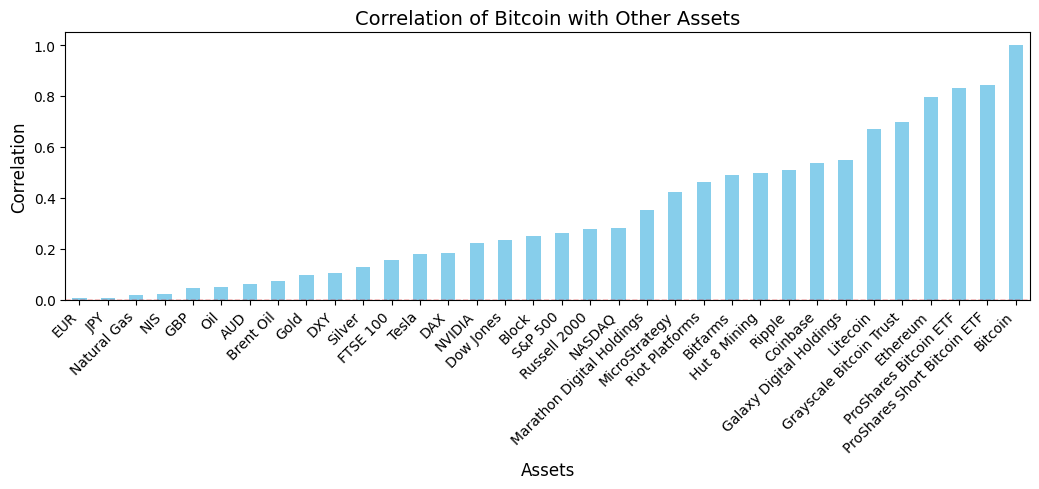

In [8]:
#Visualizations

#bar chart
plt.figure(figsize=(10.5, 5))
bitcoin_correlation_sorted.plot(kind='bar', color='skyblue')
plt.title('Correlation of Bitcoin with Other Assets', fontsize=14)
plt.xlabel('Assets', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a line at 0
plt.tight_layout()
plt.show()


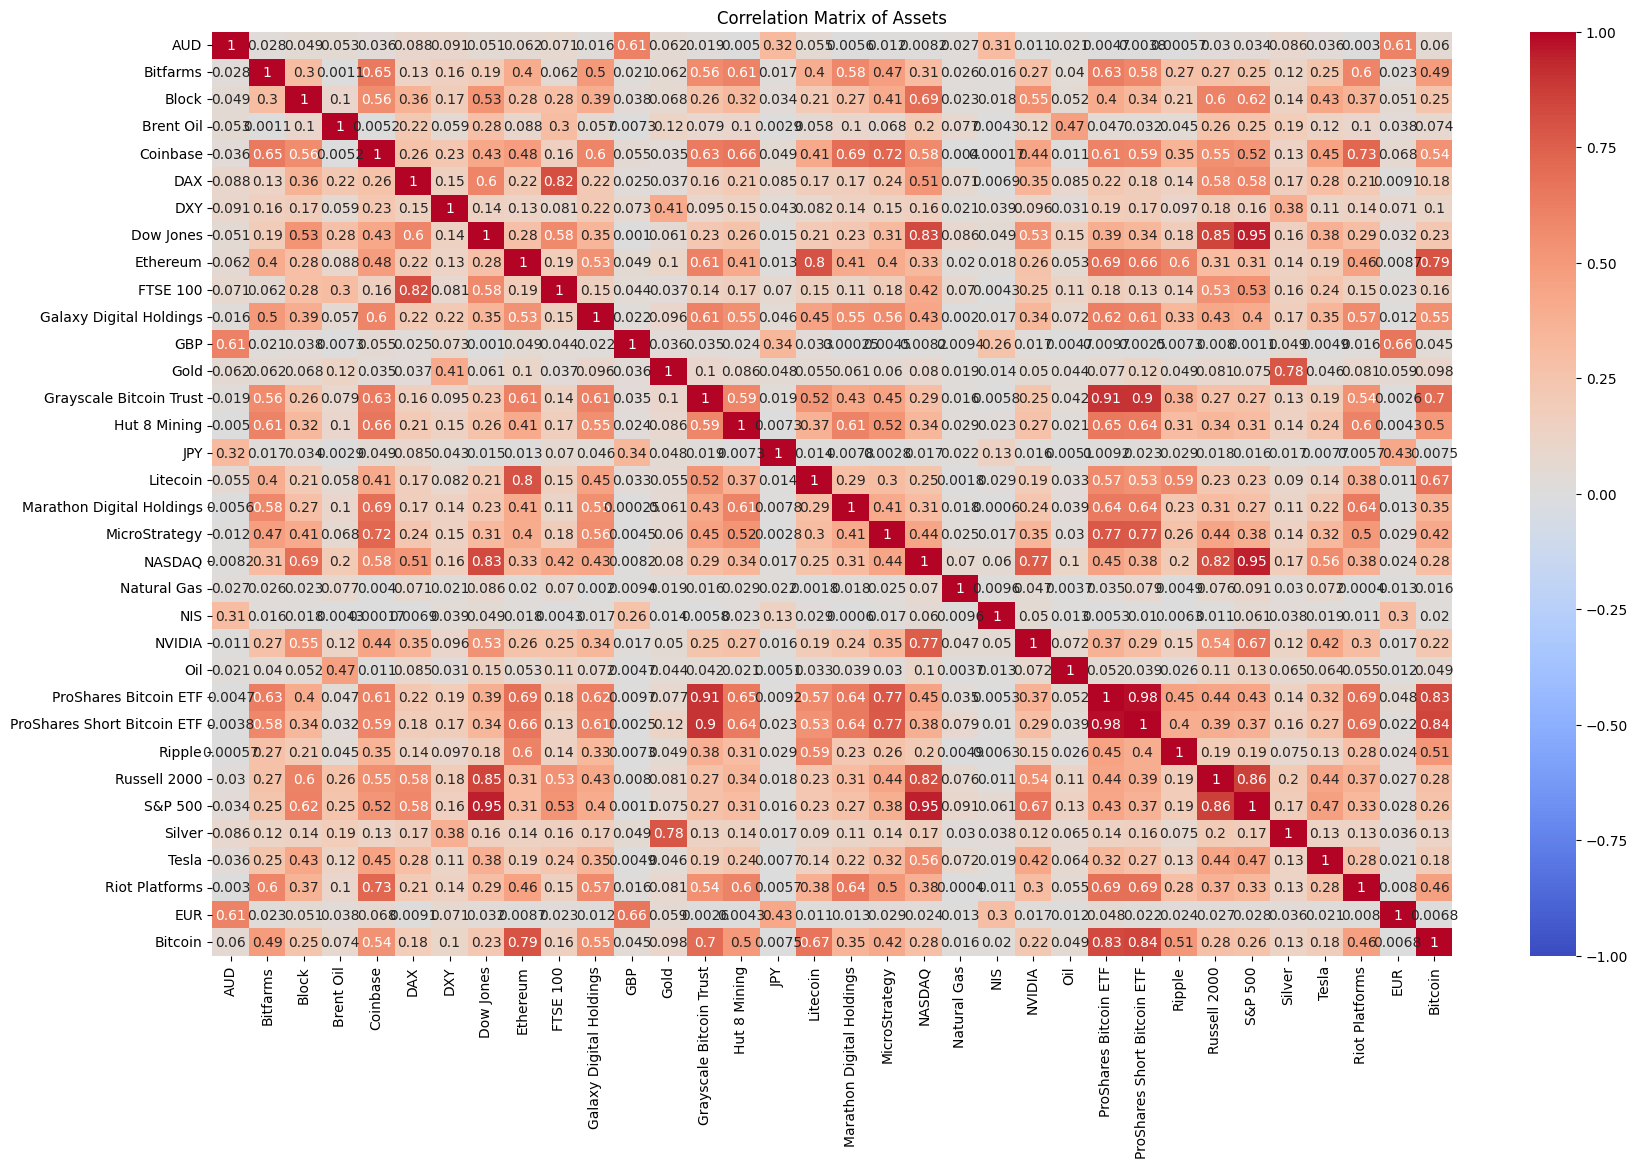

In [9]:
#correlation matrix as a heatmap
abs_correlation_matrix = correlation_matrix.abs()
plt.figure(figsize=(20, 12))
sns.heatmap(abs_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Assets')
plt.show()


In [10]:
#top 9 assets with the highest correlation to Bitcoin
top_9_assets = bitcoin_correlation_sorted.sort_values(ascending=False).iloc[1:10]
top_9_assets_names = top_9_assets.index.tolist()
print("Top 9 assets with the highest correlation to Bitcoin:")
print(top_9_assets)

Top 9 assets with the highest correlation to Bitcoin:
ProShares Short Bitcoin ETF    0.844744
ProShares Bitcoin ETF          0.830342
Ethereum                       0.794118
Grayscale Bitcoin Trust        0.698196
Litecoin                       0.670869
Galaxy Digital Holdings        0.548710
Coinbase                       0.536003
Ripple                         0.508320
Hut 8 Mining                   0.497158
Name: Bitcoin, dtype: float64


Price History of the Top 9 Assets Most Correlated with Bitcoin:



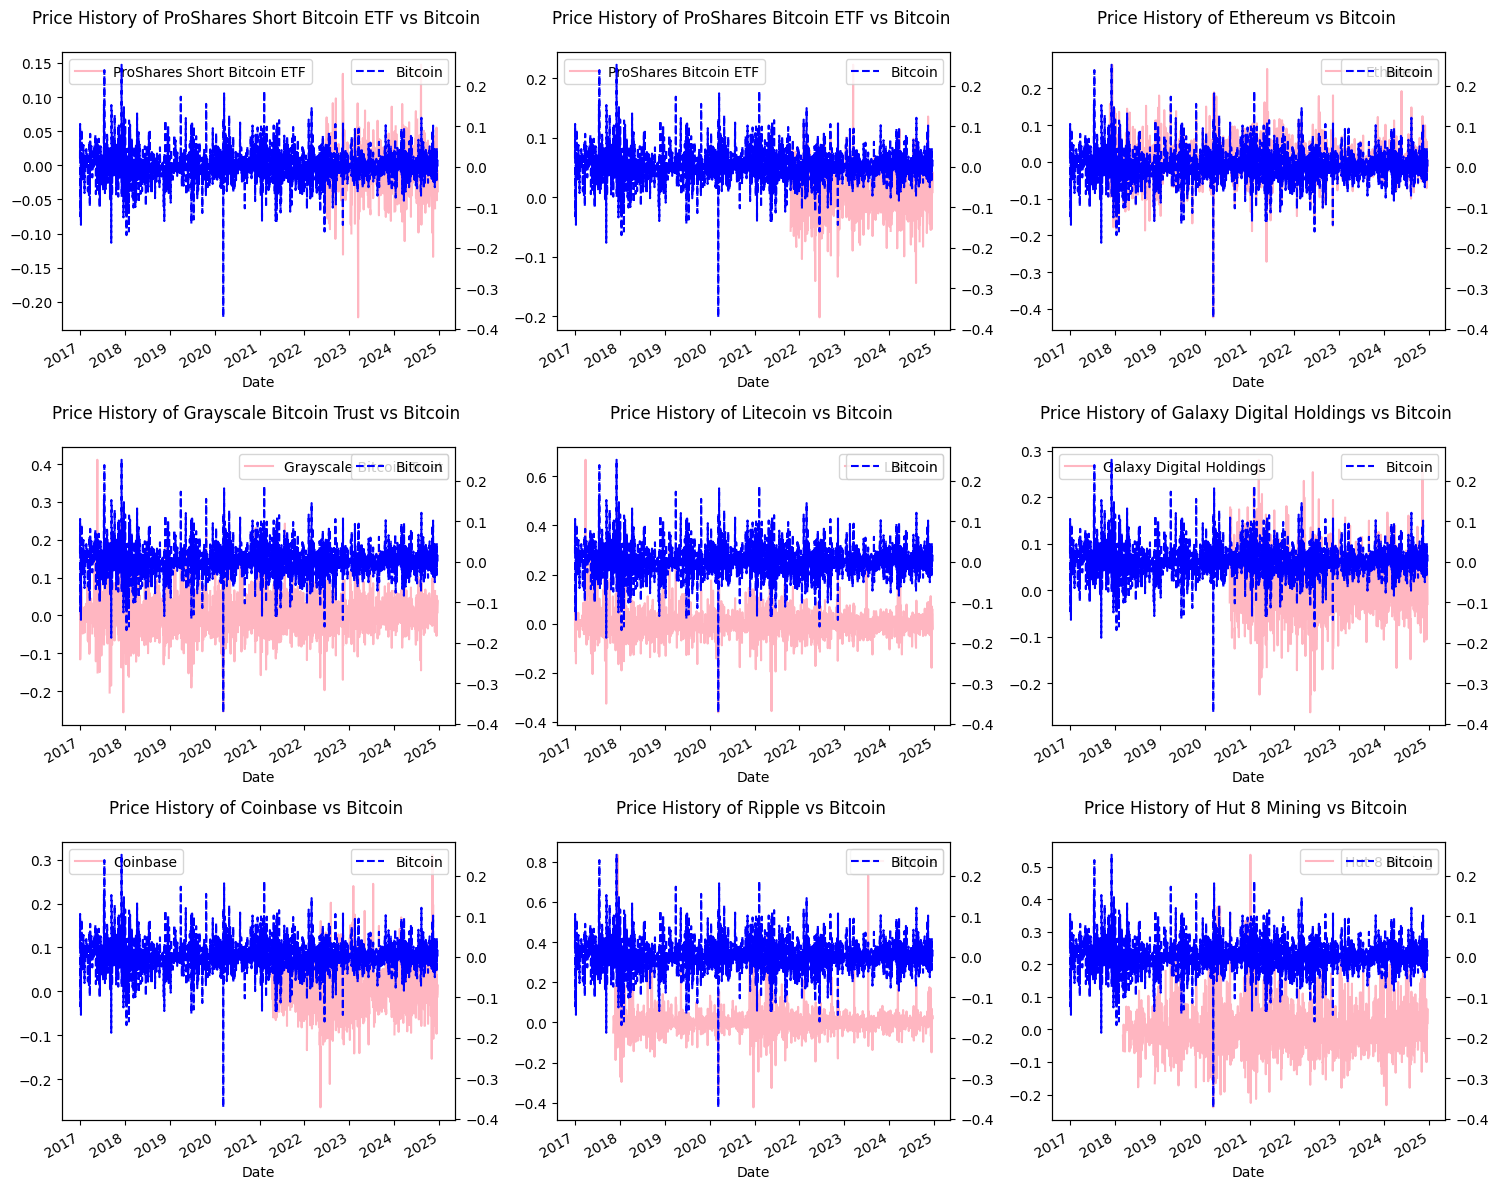

In [11]:
# Create a grid of subplots: 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through the top 9 assets and plot each one
for i, asset in enumerate(top_9_assets_names):
    # First subplot for asset's return
    ax1 = axes[i]
    returns_df[asset].plot(ax=ax1, label=asset, color='lightpink')
    ax1.set_title(f'Price History of {asset} vs Bitcoin \n')
    ax1.legend()
    # Second subplot for Bitcoin's return, sharing x-axis
    ax2 = axes[i].twinx()
    returns_df['Bitcoin'].plot(ax=ax2, label='Bitcoin', color='blue', linestyle='--')
    ax2.legend()

# Adjust layout for better spacing between subplots
print("Price History of the Top 9 Assets Most Correlated with Bitcoin:\n")
plt.tight_layout()
plt.show()


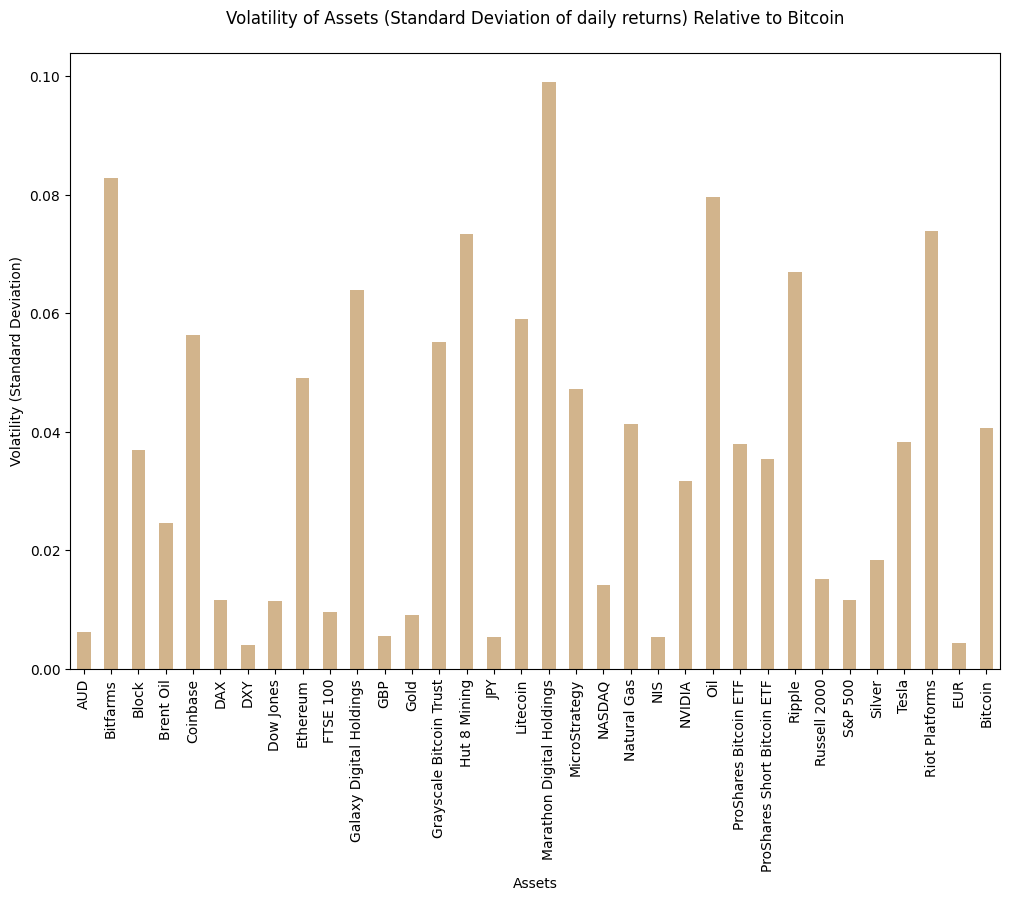

In [12]:
# Calculate the volatility (standard deviation of daily returns) of each asset
volatility = returns_df.std(axis=0)

# Plot the volatility
plt.figure(figsize=(12, 8))
volatility.plot(kind='bar', color='#D2B48C')  # Bar plot of volatility

# Set title and labels
plt.title('Volatility of Assets (Standard Deviation of daily returns) Relative to Bitcoin\n')
plt.xlabel('Assets')
plt.ylabel('Volatility (Standard Deviation)')

# Display the plot
plt.xticks(rotation=90)  # Rotate asset names for better readability
plt.show()


*italicized text*## Splitting Datasets

In [13]:
# Ensure the DataFrame is sorted by date
returns_df = returns_df.sort_index()
print(returns_df.index.is_monotonic_increasing)

# returns_df sorted with chronological time-series data
train_size = int(len(returns_df) * 0.64)
val_size = int(len(returns_df) * 0.16)
3
train_data = returns_df[:train_size]
val_data = returns_df[train_size:train_size + val_size]
test_data = returns_df[train_size + val_size:]

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")


True
Train size: 1327, Validation size: 331, Test size: 416


*Next Step: Feature Engineering*

In [14]:
for lag in range(1, 4):  # 1 to 3 days of lag
    returns_df[f'Bitcoin_Lag_{lag}'] = returns_df['Bitcoin'].shift(lag)

print(returns_df)

                 AUD  Bitfarms     Block  Brent Oil  Coinbase       DAX  \
Date                                                                      
2017-01-02       NaN       NaN       NaN        NaN       NaN       NaN   
2017-01-03 -0.001799       NaN       NaN        NaN       NaN -0.001215   
2017-01-04  0.004598       NaN  0.031861   0.017847       NaN  0.000006   
2017-01-05  0.007899       NaN  0.021754   0.007616       NaN  0.000054   
2017-01-06  0.007045       NaN  0.030220   0.003691       NaN  0.001214   
...              ...       ...       ...        ...       ...       ...   
2024-12-11 -0.009616  0.029851  0.044130   0.018424  0.037663  0.003443   
2024-12-12  0.001239 -0.024155 -0.041552  -0.001496 -0.002709  0.001329   
2024-12-13 -0.001394 -0.044554 -0.022633   0.014712 -0.007605 -0.000996   
2024-12-16 -0.001237  0.088083  0.019569  -0.007786  0.015230 -0.004514   
2024-12-17  0.001458 -0.014286  0.008211  -0.009742 -0.011639 -0.003320   

                 DXY  Do